# Crime rate clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading the dataset
crime_1=pd.read_csv("crime_data.csv")

In [3]:
crime_1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Data Cleaning

## as 1st colum is not required for our model building so we drop it 

In [4]:
crime_2=crime_1.drop(['Unnamed: 0'],axis=1)

In [5]:
crime_2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [6]:
## Chaking the shape of the data
crime_2.shape

(50, 4)

In [7]:
## chaking the discription of the data
crime_2.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
## Chaking for the null values
crime_2.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [9]:
crime_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


## Graphical Reprsentation

C:\Users\Aniket Mali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


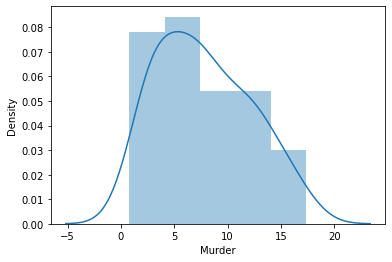

In [10]:
## Chaking for the murder
sns.distplot(crime_2['Murder'])
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

<AxesSubplot:xlabel='Murder'>

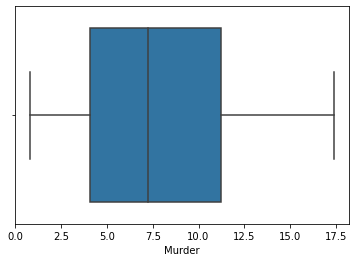

In [11]:
sns.boxplot(crime_2['Murder'])

<AxesSubplot:xlabel='Assault', ylabel='Density'>

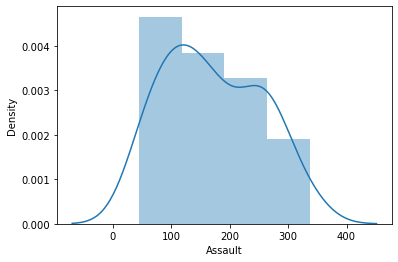

In [12]:
## Chaking for Assault
sns.distplot(crime_2['Assault'])

<AxesSubplot:xlabel='Assault'>

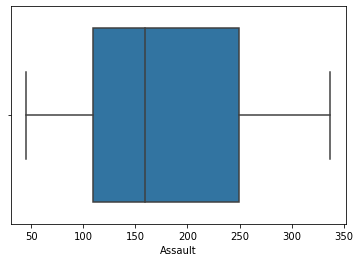

In [13]:
sns.boxplot(crime_2['Assault'])

<AxesSubplot:xlabel='UrbanPop', ylabel='Density'>

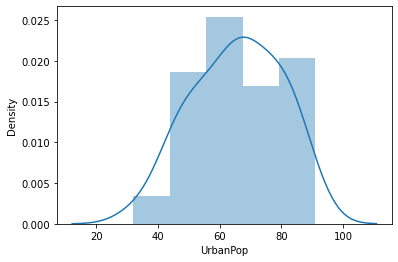

In [14]:
## Chaking for UrbanPop
sns.distplot(crime_2['UrbanPop'])

<AxesSubplot:xlabel='UrbanPop'>

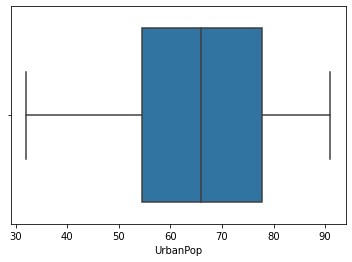

In [15]:
sns.boxplot(crime_2['UrbanPop'])

<AxesSubplot:xlabel='Rape', ylabel='Density'>

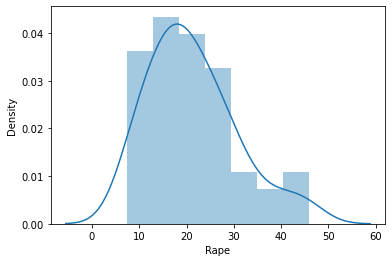

In [16]:
sns.distplot(crime_2['Rape'])

<AxesSubplot:xlabel='Rape'>

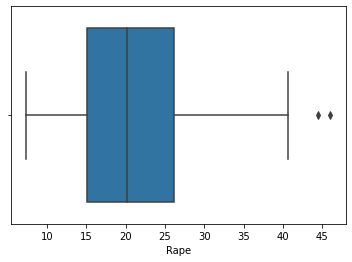

In [17]:
sns.boxplot(crime_2['Rape'])

In [18]:
## Transformation of the data
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(crime_2)
X = stscaler.transform(crime_2)

# Building of clustering Models

# 1) Hierarchical clustering

In [19]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

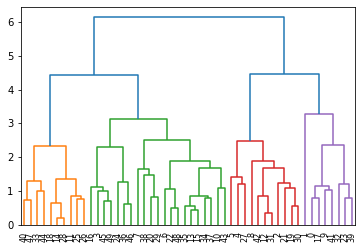

In [22]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

In [23]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [24]:
# save clusters for chart
y_hc = hc.fit_predict(X)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [25]:
Clusters

,Clusters
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [26]:
Clusters.value_counts()

Clusters
0           19
1           19
2           12
dtype: int64

## From above we got 4 Diffrent clusters that represent 4 diffrent crimes in USA

## 2) K-mean clustering

In [27]:
# Importing the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

In [28]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

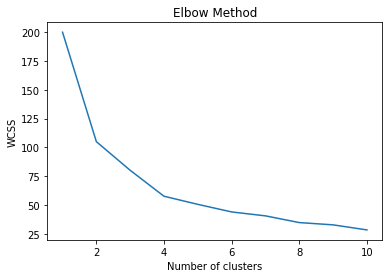

In [29]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## From the above observation we taking the elbow value of the grap as elbow value giving us effective no of clusters & i.e 3

In [30]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(X)

KMeans(n_clusters=3, random_state=42)

In [31]:
clusters_new.labels_

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [32]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(X)
# Check the result
identified_clusters

array([5, 9, 1, 4, 6, 6, 2, 4, 1, 5, 2, 0, 8, 4, 0, 4, 4, 5, 7, 1, 2, 1,
       0, 3, 4, 0, 0, 6, 0, 2, 1, 8, 3, 7, 4, 4, 4, 4, 2, 3, 7, 5, 8, 2,
       7, 4, 4, 7, 0, 4])

In [33]:
# Create a copy of the data
data_with_clusters = crime_2.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,5
1,10.0,263,48,44.5,9
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,4
4,9.0,276,91,40.6,6
5,7.9,204,78,38.7,6
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,4
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,5


## 3) DBSCAN Model

In [34]:
from sklearn.cluster import DBSCAN

In [35]:
dbscan = DBSCAN(eps=0.9, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.9)

## The value of the esp and min_sample is totally depends on domain knowledge so cluster may change as clusters are depends on that value 

In [36]:
#Noisy samples are given the label -1.
labels=dbscan.labels_

In [37]:
labels

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0],
      dtype=int64)

In [38]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [39]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


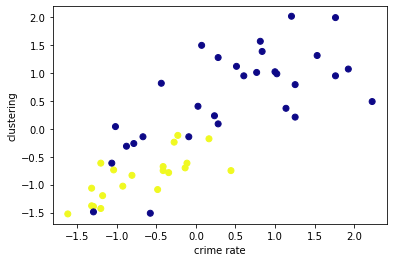

In [40]:
plt.scatter(X[:, 0], X[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("crime rate") # X-axis label
plt.ylabel("clustering") # Y-axis label
plt.show() # showing the plot

## From above ew conclude that DBSCAN considiring Blue as a one cluster & yellow as an outliers in the clustering